<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libreirie" data-toc-modified-id="Libreirie-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libreirie</a></span></li><li><span><a href="#Funzione-update()" data-toc-modified-id="Funzione-update()-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Funzione <code>update()</code></a></span></li><li><span><a href="#Frequenze" data-toc-modified-id="Frequenze-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Frequenze</a></span></li><li><span><a href="#Istogramma" data-toc-modified-id="Istogramma-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Istogramma</a></span></li></ul></div>

# Realizzazione di un istogramma
Vogliamo visualizzare su un istogramma il numero di volte che un dado casca su ciascuna faccia.


In [2]:
# Da eseguire solo se necessara istallazione della libreria, in generale alla prima esecuzione
# Il punto esclamativo sulle celle di IPython (Jupyter Nb) esegue un comando sul Terminale

# !pip install matplotlib
# !pip install numpy
# !pip install seaborn

## Libreirie

In [3]:
# Le librerie standard di python che ci serviranno in questo progetto:
import random
import collections

# Le librerie dei framework specifici:
import matplotlib.pyplot as plt # Motore grafico di python per realizzare diagrammi e fuznoni
import numpy as np # Libreria che gestisce ad altissima efficienza gli array
import seaborn as sns # Libreria che usa il motore grafico di MatplotLib con funzionalita' grafiche avanzate

# Aggiungiamo alle precedenti uan libreria di visualizzazione dinamica:
from matplotlib import animation


%matplotlib notebook

## Funzione `update()`

In [4]:
# scriviamo una funzione "update"

def update(frame_number, rolls, faces, frequencies):
    """
    Configura ciascuna bar per ciascun frame dell'animazione

    frame_number: parametro che richiama il numero del frame da usare in FuncAnimation. E' un paramentro richiesto ma non utilizzato in  update
    rolls: numero di lanci di dado per ogni frame dell'animazione
    faces: i valori delle facce del dado che verranno utilizzati per rappresentare sull'asse X
    frequencies: la lista nella quale riepiloghiamo le frequenza del dado

    """
    # Lancio il dado e aggiorno le frequenze:
    for i in range(rolls):
        frequencies[random.randrange(1,7) - 1] += 1

    plt.cla() # cancella il grafico attuale
    axes = sns.barplot(faces, frequencies, palette="bright")



In [6]:
number_of_frames = 600
rolls_per_frame = 10
sns.set_style("whitegrid")
figure = plt.figure("Rolling")

values = list(range(1,7))
frequencies = [0] * 6
die_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames = number_of_frames, interval= 33,
                                        fargs=(rolls_per_frame, values, frequencies))
plt.show()

<IPython.core.display.Javascript object>

## Frequenze
Per generare le frequenze con cui appaiono i singoli valori:
possimao usare due strade:
* Utiliziamo il metodo Counter della libreria collections: <br>
restituisce un dizionario con "tiro di dado" e "frequeza" come "chiave" e "valore":
> `collections.Counter(lista)`<br>

* Utiliziamo la funzione unique della libreria Numpy,costruita per cercare i valori unici di un iterabile
con il parametro "return_counts = True" restituisce anche le occorrenze di ciascun valore
Restituisce due liste rispettivamente con l'elenco degli elementi unici ordinati e il numero di occorrenze per ciascuno
di essi
> `np.unique(lista, retunr_counts = True)`

In [7]:
def basic_animation(frames=100, interval=30):
    """Plot a basic sine wave with oscillating amplitude"""
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
    line, = ax.plot([], [], lw=2)

    x = np.linspace(0, 10, 1000)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        y = np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi)
        line.set_data(x, y)
        return line,

    return animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval) 
basic_animation()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


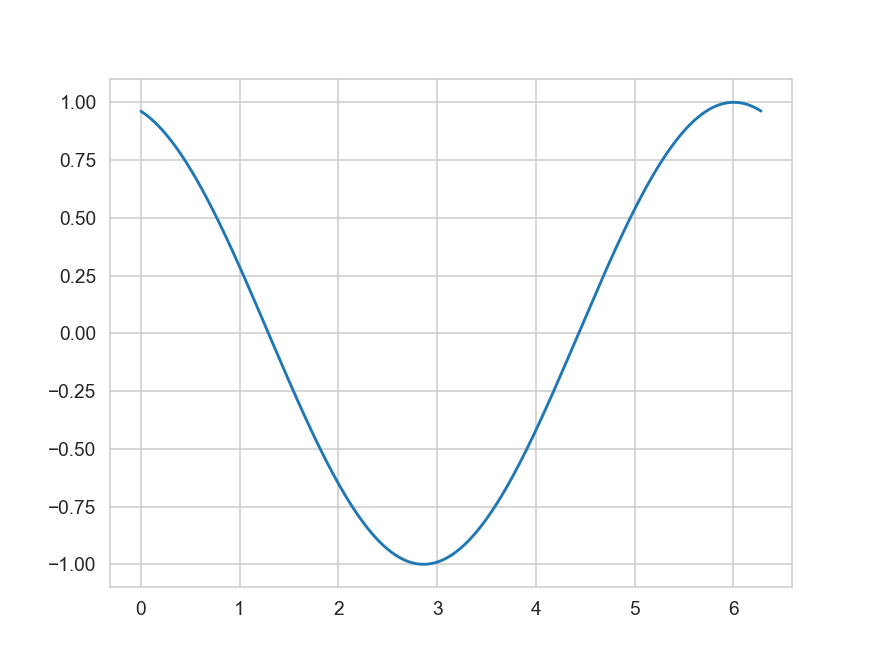

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.arange(0, 2 * np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 10))
    return line,
# note: no anim=animation.FuncAnimation(...) assignment
anim  = animation.FuncAnimation(fig, animate)
plt.show()

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

%matplotlib notebook

def load_data():
    data = np.genfromtxt('data.txt', delimiter=',', skip_header=1)
    tm = data[:, 0]
    Q1 = data[:, 1]
    Q2 = data[:, 2]
    T1 = data[:, 3]
    T2 = data[:, 4]
    return (tm, Q1, Q2, T1, T2)

(m_time, Q1s, Q2s, T1s, T2s) = load_data()

n = len(m_time)

labels = [
    [r'$T_1$ measured', r'$T_2$ measured'],
    # [r'$T_1 set point$', r'$T_2 set point$'],
    [r'$Q_1$', r'$Q_2$']
]

colors = [
    ['r:', 'b-'],
    ['r:', 'bx']
]

def plot_init(num_subplots=1, x_labels=None, y_labels=None):
    if not x_labels:
        x_labels = [None] * num_subplots
    if not y_labels:
        y_labels = [None] * num_subplots
    fig = plt.figure(figsize=(12,6), dpi=80)
    fig.subplots_adjust(hspace=.5)
    axes = []
    for i in range(1, num_subplots + 1):
        ax = plt.subplot(num_subplots, 1, i)
        ax.grid()
        if x_labels[i-1]:
            ax.set_xlabel(x_labels[i-1])
        if y_labels[i-1]:
            ax.set_ylabel(y_labels[i-1])
        axes.append(ax)
    return fig, axes

def plot_update(fig, axes, xs, ys, colors, labels):
    for i in range(len(axes)):
        for j in range(len(ys[i])):
            axes[i].plot(xs, ys[i][j], colors[i][j])
        axes[i].legend(labels=labels[i])
    fig.canvas.draw()


fig, axes = plot_init(
    num_subplots=2,
    x_labels=[None, 'Time (sec)'],
    y_labels=['Temps (C)', 'Heaters']
)

for i in range(1, n):
    try:
        ys = [
            [T1s[:i], T2s[:i]],
            [Q1s[:i], Q2s[:i]]
        ]
        plot_update(fig, axes, m_time[:i], ys, colors, labels)
        time.sleep(0.2)
    except KeyboardInterrupt:
        break

<IPython.core.display.Javascript object>